In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 1000) # shows all the columns
pd.set_option('display.float_format', lambda x: '%.4f' % x) # displays outputs with 1 decimal
pd.set_option('display.max_rows', 10000) # shows all the rows
%matplotlib inline

## Feature Engineering

Feature Engineering is an important step because this helps the model to get more information and thus predicting better

Creating few features based on categorical features :
- Creating a variable where a house has both a waterfront and a view
- Age of the building - how is is house price related to the age of the building
- Whether the house has been renovated : whether house price gets impacted for ever being renovated or not?
- If the house has a basement : whether house price gets impacted with having a basement or not?
- Size of an average room in sq ft : how is is house price related to the average size of a room

**House with both waterfront and a view**

-- Based on the EDA notebook, house with a waterfront or a view other than 0, hold less than 5% of population. This variable can denote how expensive a house can be.

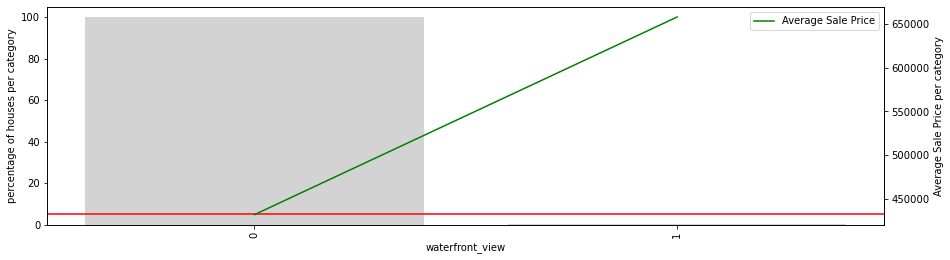

In [38]:
data2['waterfront_view']=np.where((data2['waterfront']==1) & ((data2['view']>=1) & (data2['view']>=4)),1,0);

temp_df = calculate_mean_target_per_category(data2, 'waterfront_view')
plot_categories(temp_df,'waterfront_view')

**Age of the building**- The age of house is not showing any relation with the house price

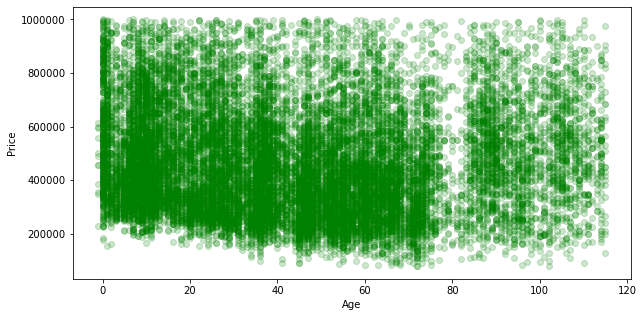

In [39]:
data2['sale_yr']=data2['date'].dt.year
data2['age']=data2['sale_yr']-data2['yr_built']
plt.figure(figsize=(10, 5))
plt.scatter(x='age',y='price',data=data2,alpha=0.2,c='green')
plt.xlabel("Age")
plt.ylabel("Price")
plt.ticklabel_format(style='plain', axis='y') ; 

**Has the apartment ever been  renovated?** - Variable showing houses being renovated and how the house is impacted. As showed by the following graph, renovated house has higher price value

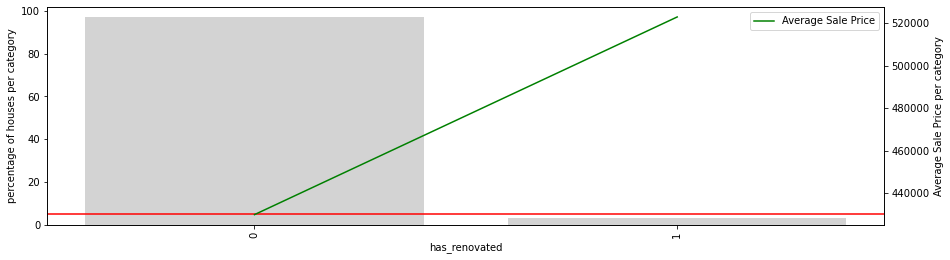

In [40]:
data2['has_renovated']=np.where(data2['yr_renovated']==0,0,1)
temp_df = calculate_mean_target_per_category(data2, 'has_renovated')
plot_categories(temp_df,'has_renovated')

**House with a basement  ?** - Variable showing houses having a basement and how the house is impacted. As showed by the following graph, a house with basement has higher price value

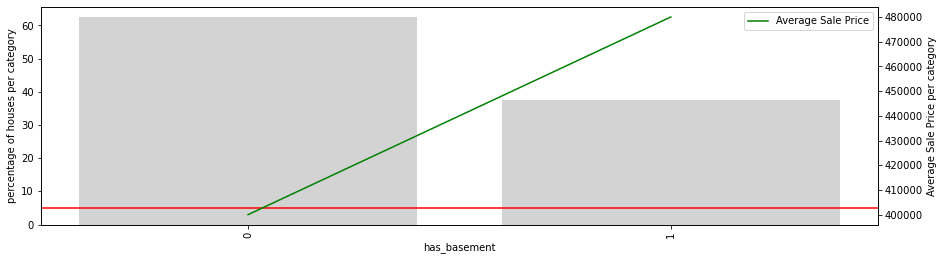

In [41]:
data2['has_basement']=np.where(data2['sqft_basement']==0,0,1)
temp_df = calculate_mean_target_per_category(data2, 'has_basement')
plot_categories(temp_df,'has_basement')

**Average size of a room (sqft)** - Deriving a variable how big a room is on average and how does it impact house price. Below graph shows, these two variables are linear in nature.

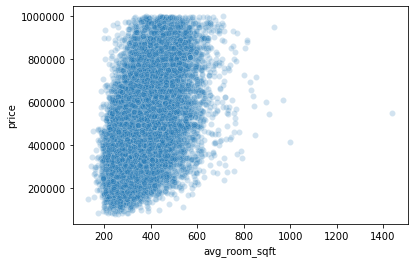

In [43]:
data2['avg_room_sqft']=data2['sqft_living']/(data2['bedrooms']+data2['bathrooms'])
sns.scatterplot(x='avg_room_sqft',y='price',data=data2,alpha=0.2)
plt.ticklabel_format(style='plain', axis='y') ; 

# Data Preprocessing

### Dropping irrevalent variables

Dropping few variables which are not needed anymore and other variables are already been derived

In [44]:
drop_var=['yr_built','yr_renovated','zipcode','sale_yr']
data3=data2.drop(drop_var,axis=1)

### Dummy creation for categorical variables which not one-hot encoded

Creating dummies for the zipcode group and the month variable. This is an important step so that each levels of the categorical feature is given equal importance

In [45]:
dummy_var=['zipcode_group','sale_mnth']
data4=pd.get_dummies(data=data3,columns=dummy_var,drop_first=True)
data4.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,waterfront_view,age,has_renovated,has_basement,avg_room_sqft,zipcode_group_9801,zipcode_group_9802,zipcode_group_9803,zipcode_group_9804,zipcode_group_9805,zipcode_group_9806,zipcode_group_9807,zipcode_group_9809,zipcode_group_9810,zipcode_group_9811,zipcode_group_9812,zipcode_group_9813,zipcode_group_9814,zipcode_group_9815,zipcode_group_9816,zipcode_group_9817,zipcode_group_9818,zipcode_group_9819,sale_mnth_2,sale_mnth_3,sale_mnth_4,sale_mnth_5,sale_mnth_6,sale_mnth_7,sale_mnth_8,sale_mnth_9,sale_mnth_10,sale_mnth_11,sale_mnth_12
0,7129300520,2014-10-13,221900,3,1.0000,1180,5650,1.0000,0.0000,0.0000,3,7,1180,0,47.5112,-122.2570,1340,5650,0,59,0,0,295.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,6414100192,2014-12-09,538000,3,2.2500,2570,7242,2.0000,0.0000,0.0000,3,7,2170,400,47.7210,-122.3190,1690,7639,0,63,1,1,489.5238,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,5631500400,2015-02-25,180000,2,1.0000,770,10000,1.0000,0.0000,0.0000,3,6,770,0,47.7379,-122.2330,2720,8062,0,82,0,0,256.6667,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,2487200875,2014-12-09,604000,4,3.0000,1960,5000,1.0000,0.0000,0.0000,5,7,1050,910,47.5208,-122.3930,1360,5000,0,49,0,1,280.0000,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1954400510,2015-02-18,510000,3,2.0000,1680,8080,1.0000,0.0000,0.0000,3,8,1680,0,47.6168,-122.0450,1800,7503,0,28,0,0,336.0000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


### Correlation of price with other features

Creating a correlation chart to finally see which variables are correlated to price variable. 
The graph shows features such as sqft_living,number of bathrooms,grade are higly correlated with price

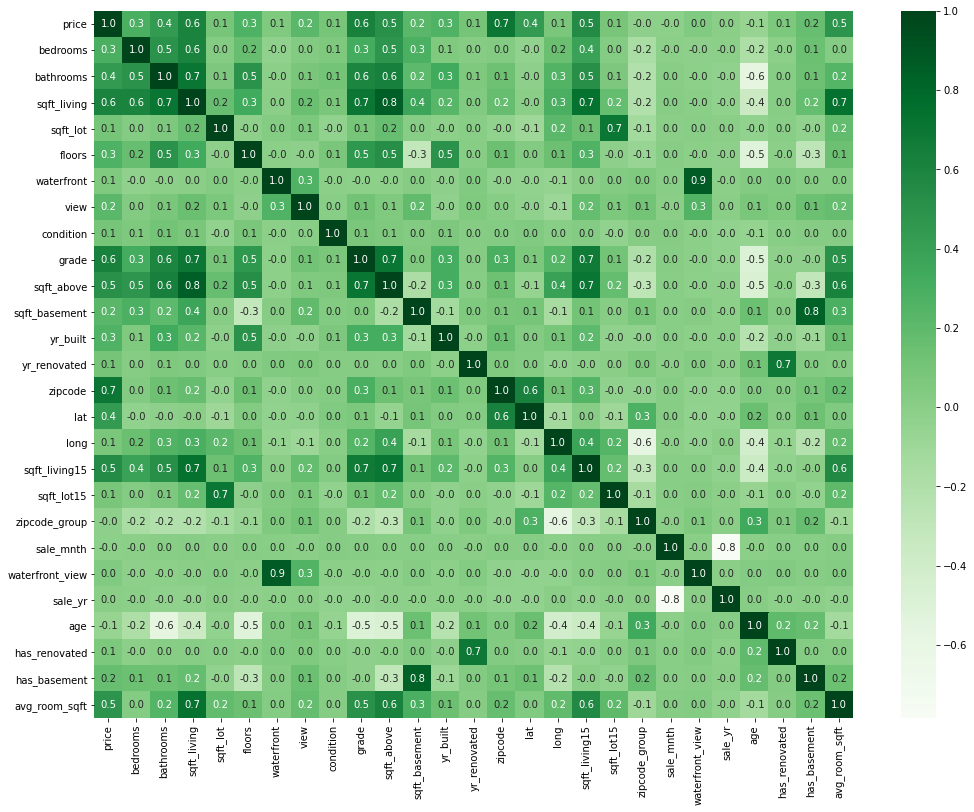

In [46]:
categorical_vars=['waterfront', 'view', 'condition', 'grade', 'waterfront_view',
                  'yr_built','yr_renovated','zipcode','sale_yr','has_renovated', 'has_basement']
data_corr=data2[:]
for cat in categorical_vars:
    means=data_corr.groupby(cat)['price'].mean()
    data_corr[cat] = data_corr[cat].map(means)
fig = plt.figure(figsize=(17, 13))
features=data_corr.iloc[:,2:].columns
sns.heatmap(data_corr[features].corr(), cmap='Greens',annot=True,fmt='.1f',)
plt.xticks(rotation=90)
plt.show()